In [279]:
import pytesseract
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rotate

from deskew import determine_skew
import glob


#Define path to tessaract.exe
path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#Define path to image
path_to_image = '00d11cfb-7b1d-4854-8eef-8190a498124d.jpg'

#Point tessaract_cmd to tessaract.exe
pytesseract.tesseract_cmd = path_to_tesseract

#Open image with PIL
img = Image.open(path_to_image)

#Extract text from image
text = pytesseract.image_to_string(img)


In [280]:
text

''

In [281]:
from scipy import ndimage

#rotation angle in degree
img = ndimage.rotate(img, 4.5)
img = Image.fromarray(img)
save_path = 'rotated_image.jpg'
img.save(save_path)

In [282]:
preprocessed_image = img.filter(ImageFilter.GaussianBlur(radius=0))

preprocessed_image = preprocessed_image.convert("L")  # Convert to grayscale
preprocessed_image = ImageEnhance.Contrast(preprocessed_image).enhance(1.5)  # Increase contrast
preprocessed_image = preprocessed_image.filter(ImageFilter.UnsharpMask(radius=1.5, percent=150, threshold=30))


# Perform OCR using Tesseract
text = pytesseract.image_to_string(preprocessed_image)

# Print the extracted text
print(text)

UMOWA SPRZEDAZY SAMOCHODU

2021-06-20

Zawarta w dniu . pomigdzy:

ar dokumentu tozsamosei:
Presydenta miata Wacyn
wydany preez etn ”

a

-, ‘: FANIYA HUMILIN
Kupujacym (imig 1 nazwisko):..

13065125: 1186231
PESEL?: BM saeeue NIP: , 3681862210,

Adres:

Rodzaj i nr dokumentu tozsamo’

yd
wydany prez Peer

Preedmiotem umowy jest sprzedaz pojazdi

Mazda
marka‘model .Ma#4

6131968

rok produkeji
ar nadworia

nr rejestracyjr ae preebieg (km).

Sprzedajacy oswiadera, 2e pojazd bedgcy przedmiotem umowy stanowi jego wylyczng wlasnosé, jest
wolny od wad prawnych oraz praw osdb trzecich, Ze nie toczy sig Zadne postgpowanie, ktorego

przedmiotem jest ten pojazd, Ze nie stanowi on rownie? przedmiotu zabezpicczenia.

S aA 195843
Strony ustalily wartosé przedmiotu umowy na kwotg: .

(slowni ierdzenia. Kazda konstrukeja i kazdet
Sprzedajacy przenosi na rzecz kupujacego wlasnosé przedmiotu, o ktérym mowa w §1 niniejszej umowy
za kwotg okreslong w §3 niniejsze) umowy. ktére} otrzymanie sprzedajacy kw

In [262]:
text = pytesseract.image_to_string(preprocessed_image)

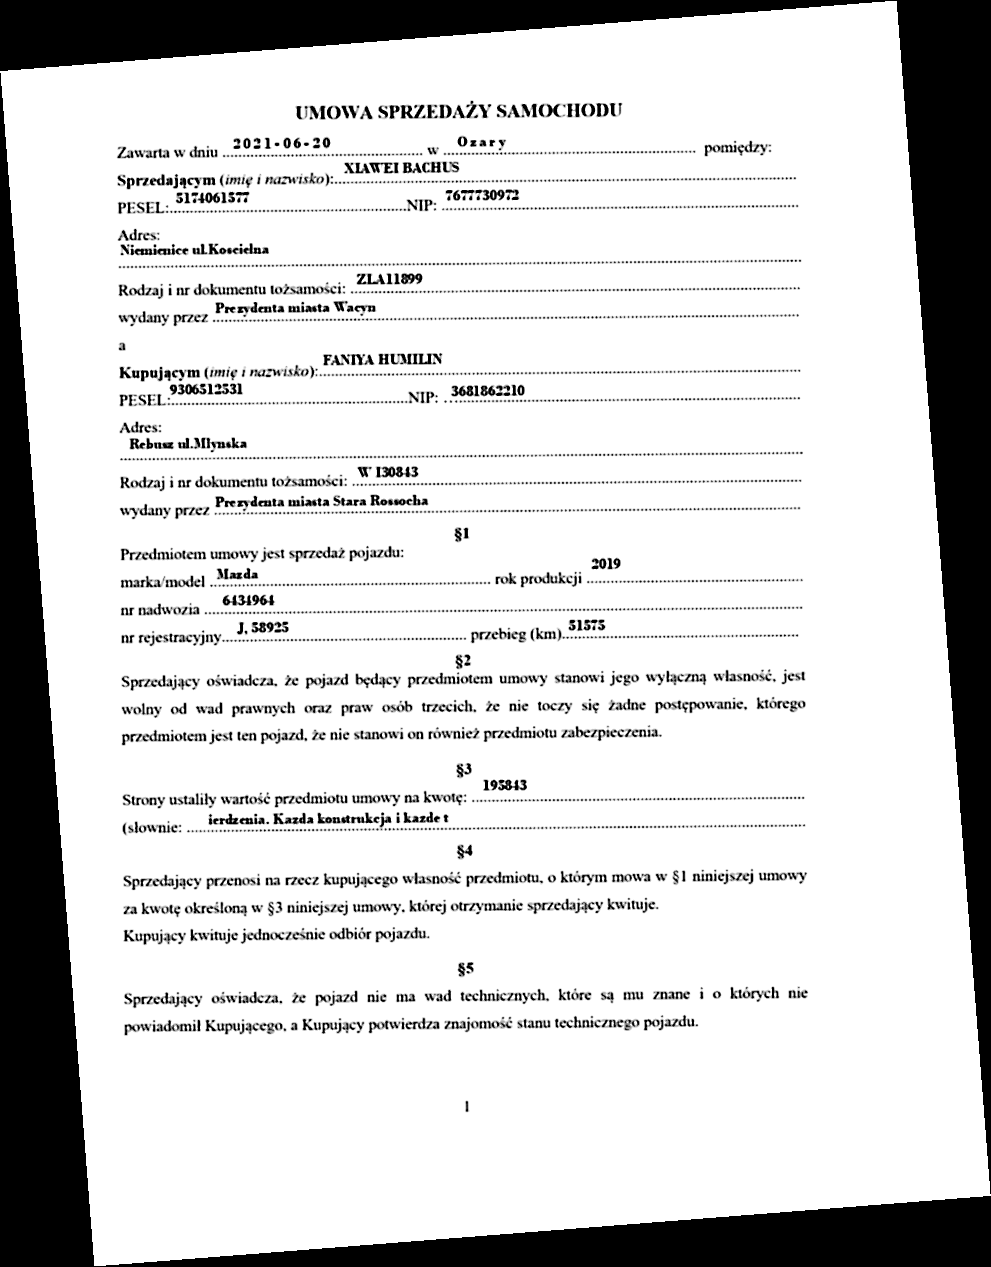

In [263]:
preprocessed_image

In [310]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rotate

from deskew import determine_skew
import glob

In [321]:
input_list_names = glob.glob("DANE/przykladowe_zdj/przykladowe_zdj/*",)
for photo_name in input_list_names:
    name = photo_name.split("\\")[-1]
    name = name.split(".")[0]

    image = io.imread(photo_name)
    angle = determine_skew(image)
    rotated = rotate(image, angle, resize=True) * 255
    io.imsave(f'deskewed/{name}.png', rotated.astype(np.uint8))

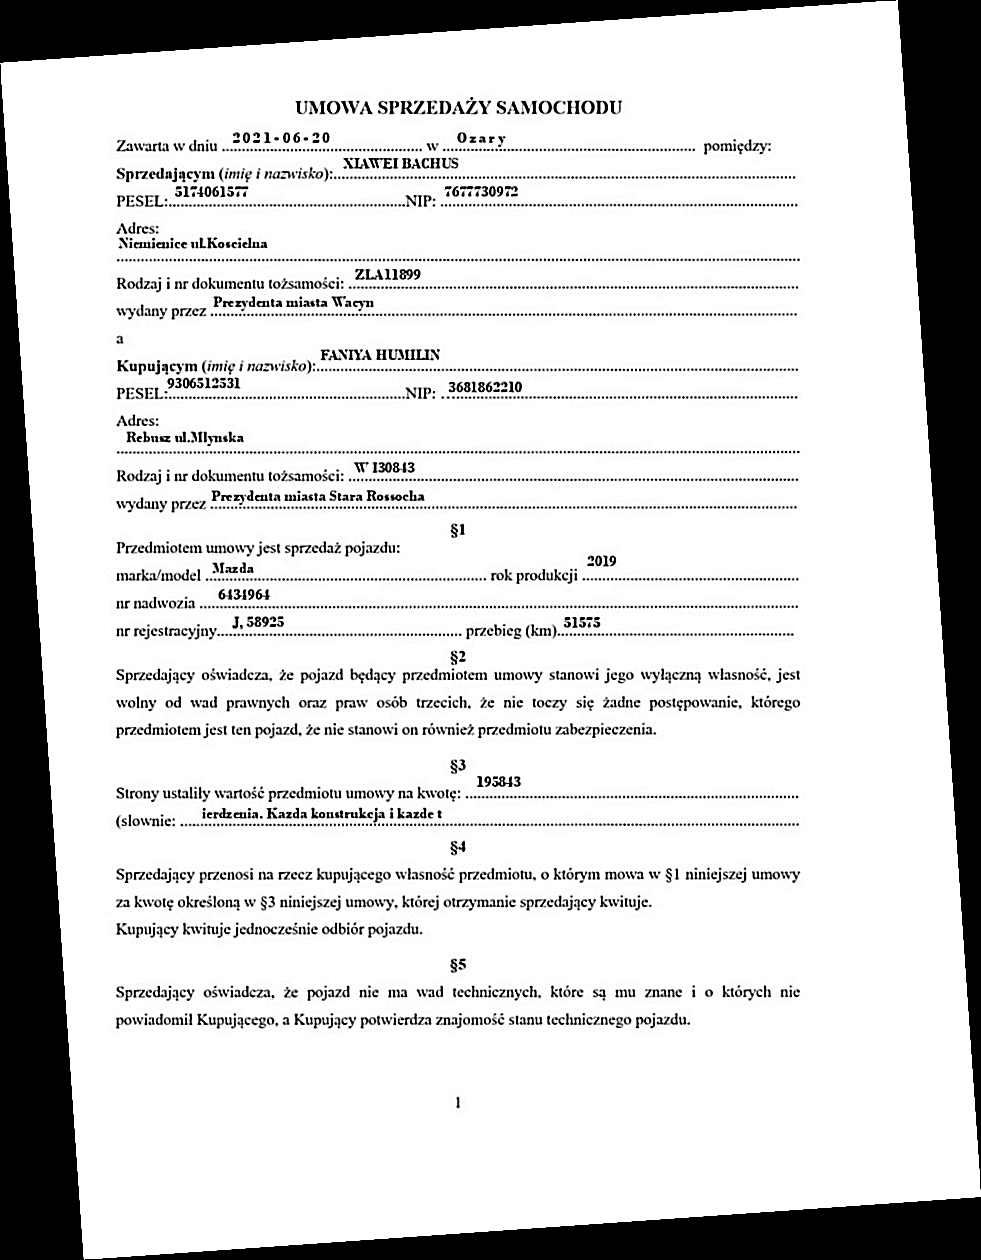

In [322]:
import cv2
import numpy as np

# Load the path of the image
original_image = cv2.imread("deskewed/00d11cfb-7b1d-4854-8eef-8190a498124d.png")

# Create a sharpening kernel
sharpen_filter = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])

# Applying the kernel to the input image to get the sharpened image
sharp_image = cv2.filter2D(original_image, -1, sharpen_filter)
sharp_image = Image.fromarray(sharp_image)
sharp_image

In [324]:
custom_config = r'--oem 3 --psm 6 -l pol'

# Perform OCR using pytesseract
text = pytesseract.image_to_string(sharp_image, config=custom_config)

# Print the extracted text
print(text)

UMOWA SPRZEDAŻY SAMOCHODU
Zawarta w dniu ..20217087,20, mma W m OZAED mara, POMIĘdZY:
X (CHUS
Sprzedającym (imię i Nazwiska
Adres:
Niemienice uLKoscielna
Rodzaj i nr dokumentu tożsamości: „ZEALIGY, eee
Prezydenta miasta Wacyn
a
5 FANIYA HUMILIN
Kupującym (imi i NAZWISKO eee
306512531 22]
Adres:
Rebnsz ul.Mlynska
Rodzaj i nr dokumentu tożsamości: „130883, awek
$1
Przedmiotem umowy jest sprzedaż pojazdu: AG
marka/model „MSZA oozowwnnnaaznawnnzna POK PTOAWKCJI esse
ne rejestracyjny... 31 SB9Z5, mamma PIZEDIE (KM). ŚLSTŚ,. amar
$2
Sprzedający oświadcza, że pojazd będący przedmiotem umowy stanowi jego wyłączną własność, jest
wolny od wad prawnych oraz praw osób trzecich, że nie toczy się żadne postępowanie, którego
przedmiotem jest ten pojazd, że nie stanowi on również przedmiotu zabezpieczenia.
$3
F żę - 195843
Strony ustaliły wartość przedmiotu UMOWY NA KWOlĘ: ..smsreseereseeew wewn r zera eraye aware yty
s4
Sprzedający przenosi na rzecz kupującego własność przedmiotu, o którym mowa w $1 